<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Teoría de Circuitos II

# Problema desafío



Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

In [2]:
fp = 500
fs = 1500
alpha_max = 1
alpha_min = 18

a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.

In [4]:
import math as m

N_w1 = 2*m.pi*fp  # Norma de frecuencia
# y usando la norma:
wp = 1
ws = fs/fp

# conociendo la transferencia de un filtro de maxima plnicidad:
epsilon_cuad = pow(10, 0.1*alpha_max) - 1   # despejo epsilon cuadrado
epsilon = m.sqrt(epsilon_cuad)
N = m.log( (pow(10, alpha_min/10) - 1) / epsilon_cuad ) / (2 * m.log(ws))   # despejo n

# analizo lo obtenido
print('N = %s'%N)
if ( N > 2 ):
    print("No se puede realizar con una sola sección de segundo orden")
else:
    print("Si se puede realizar con una sola sección de segundo orden")

N = 2.4940065748286493
No se puede realizar con una sola sección de segundo orden


b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:
 
   * la función transferencia normalizada
   * las respuestas de módulo, fase y la localización de polos y ceros


'Polos en: -0.5488671642819638 ± j 0.8951285740199137'

<IPython.core.display.Math object>

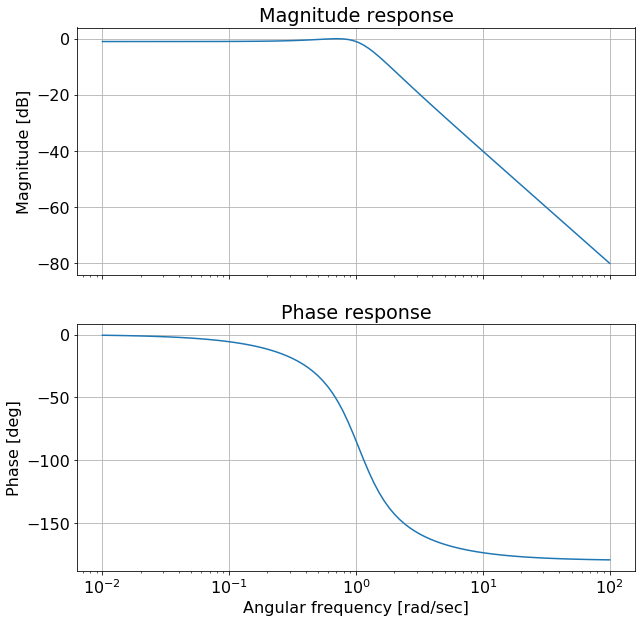

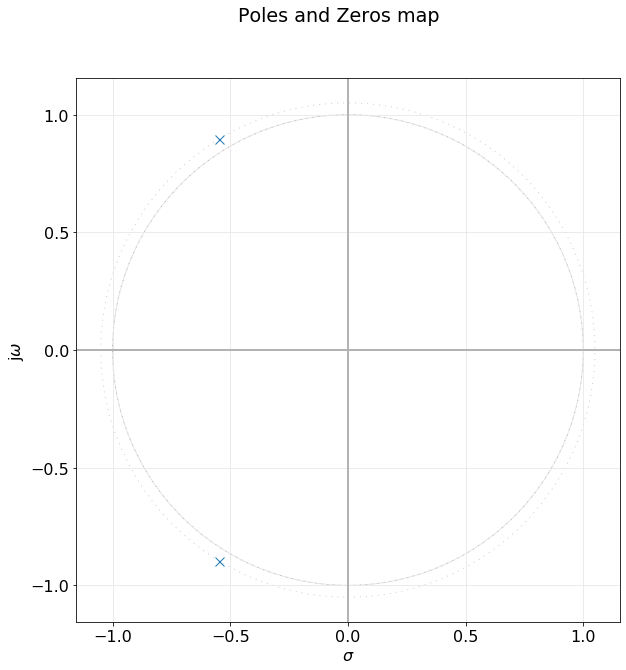

In [13]:
import scipy.signal as signal

# aunque podria usar estas dos funciones:
# z,p,k = signal.cheb1ap(N, alpha_max)
# tf_n, tf_d = signal.zpk2tf(z,p,k)

# hice el procedimiento que haria en papel:

# obtengo el N (aunque supongo que iba a ser 2)
N = m.acosh(m.sqrt((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1))) / m.acosh(ws)
N = m.ceil(N)

# arrays para lo prox
sigma = [0] * N
omega = [0] * N

# uso el metodo de shauman para sacar los polos
a = m.asinh( 1/epsilon ) / N
for k in list(range(1, N+1)):
    sigma[k-1] = -m.sinh(a) * m.sin(m.pi*(2*k-1)/(2*N))
    omega[k-1] = m.cosh(a) * m.cos(m.pi*(2*k-1)/(2*N))
# y saco la ganancia que hace de numerador
num = 1 / (pow(2,N-1) * epsilon)

# para no complicarla y sabiendo que el N=2, formo el denominador
# (aunque bueno esto ya deja de servir para N!=2)
den = [1, -2*sigma[0], sigma[0]**2+omega[0]**2]    

# armo lo que se va a ver en MarkDown
from IPython.display import display, Math, Latex
# polos
polosString = 'Polos en: sigma_0 ± j omega_0'
polosString = polosString.replace('sigma_0',str(sigma[0])).replace('omega_0',str(omega[0]))
display(polosString)
# transferencia
equation = r'T(s) = \frac{num}{s^2 · den_0 + s · den_1 + den_2}'
equation = equation.replace('den_0',str(den[0])).replace('den_1',str(den[1])).replace('den_2',str(den[2])).replace('num',str(num))
display(Math(equation))

# armo el bodo y el diagrama de polos y ceros
tf = signal.TransferFunction(num, den)

import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams['figure.figsize'] = (10,10)
#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
#fig_font_family = 'Ubuntu'    # esto del Ubuntu no funco
fig_font_size = 16
plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})
from splane import bodePlot, pzmap
_, axes_hdl = bodePlot(tf)
plt.gca
pzmap(tf)
plt.show()

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede simular la función transferencia normalizada con el siguiente script. Solo hace falta que cambies algunos parámetros.
</div>

 c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.
  
 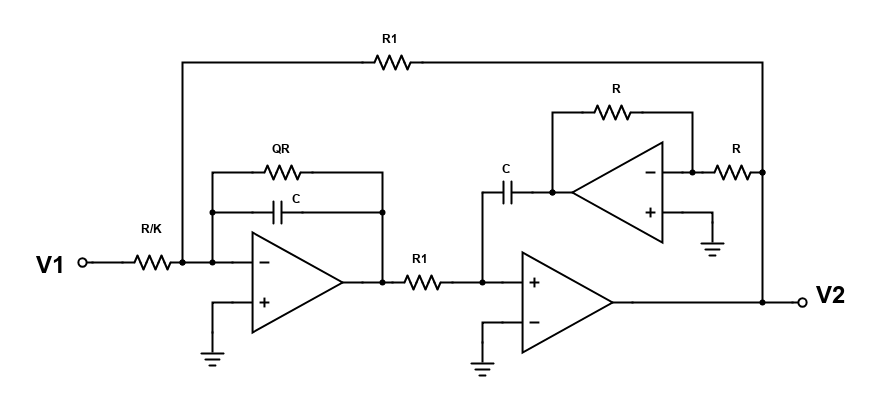

 

Sabiendo que este se trata de un modelo de Ackerberg Mossberg, y conociendo las ecuaciones de diseño del mismo:

<img src="./Akerberg-Mossberg.jpg" align="center" width="50%" /> 

In [23]:
# calculo de los componentes normalizados
# imponiendo C y usando R1=R
C = 100e-9   # impongo C de forma que la desnormalizada sea 
C_n = C * N_w1   
k = num / den[2]
Q = m.sqrt(den[2]) / den[1]
R = 1 / (C_n * m.sqrt(den[2]))

print('R = %s kΩ' % (R/1000))
print('C = %s nF' % (C*1e9))
print('Q = %s' % Q)
print('k = %s' % k)

# y bueno aca termina la flexibilidad del python...

R = 3.0315085262356596 kΩ
C = 100.0 nF
Q = 0.956520071193359
k = 0.8912509381337453


Y usando estos valores en la simulacion del LtSpice:

<img src="./desafio_cheby_circ.png" align="center" width="50%" /> 

<img src="./desafio_cheby_bode1.png" align="center" /> 

<img src="./desafio_cheby_bode2.png" align="center" /> 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede encontrar un análisis pormenorizado de esta estructura en el libro de Schaumann.
</div>

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" /> Incluya capturas de:
<ul>
<li>la red simulada</li>
<li>al menos 2 detalles de la respuesta de módulo donde contrasta mediante cursores el correcto desempeño del filtro</li>
</ul> 
</div>

# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio público tuyo de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online en mi github](https://nbviewer.jupyter.org/github/marianux/jupytest/blob/master/desafio_cheby.ipynb) y [proyectado con nbviewer](https://github.com/marianux/jupytest/blob/master/desafio_cheby.ipynb). Yo prefiero usar la última opción, pero para gustos los colores ;)